# EDA - GEDA
## Estancia de investigación Maestría de Ciencia de Datos
## Aide Jazmín González Cruz

### 1. Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import sys
import os
from os.path import dirname
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
sys.path.append(dirname('../src'))
from src.utils import utils

### 2. Carga de datos

In [2]:
df = utils.load_df("../Data/preprocessing_data.pkl")
df

,newid,cx_curp,glucosa,colesterol,trigliceridos,hdl,ldl,presion_arterial,hba1c,plaquetas,...,hta,dm_cie,hta_cie,fecha_laboratorio,dif_date_lab,dif_date_lab_from_ini,occurance_counter,año_dx_dm,año_dx_hta,year_consulta
0,2128MAXA480701EQOUDRC1,MAXA480701EQOUDRC1,NaN,NaN,NaN,NaN,NaN,130/90,NaN,NaN,...,0.0,0.0,0.0,NaT,NaN,NaN,1,NaN,NaN,2003
1,31723PEVR470901ASKH1QC1,PEVR470901ASKH1QC1,134,NaN,NaN,NaN,NaN,120/90,NaN,NaN,...,0.0,0.0,0.0,NaT,NaN,NaN,2,NaN,NaN,2004
2,41103ROGG540607PNXOCQD4,ROGG540607PNXOCQD4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaT,NaN,NaN,3,NaN,NaN,2004
3,46589PEVR470901ASKH1QC1,PEVR470901ASKH1QC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaT,NaN,NaN,4,NaN,NaN,2004
4,47454MAXA480701EQOUDRC1,MAXA480701EQOUDRC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaT,NaN,NaN,5,NaN,NaN,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,6410853MAVC341201G0YJFRC1,MAVC341201G0YJFRC1,110|0,NaN,NaN,NaN,NaN,130/75,NaN,NaN,...,0.0,1.0,0.0,NaT,NaN,NaN,4441,2000.0,2010.0,2021
4995,3356716COAG580101F7ALKRC3,COAG580101F7ALKRC3,206|0,NaN,NaN,NaN,NaN,120/80,NaN,NaN,...,0.0,1.0,0.0,NaT,NaN,NaN,4442,1997.0,NaN,2021
4996,3359740PAGJ690411WZ0YDRC1,PAGJ690411WZ0YDRC1,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaT,NaN,NaN,4443,NaN,NaN,2021
4997,8273014MAXA480701EQOUDRC1,MAXA480701EQOUDRC1,124,NaN,NaN,NaN,NaN,110/70,NaN,NaN,...,0.0,0.0,0.0,NaT,NaN,NaN,4444,NaN,NaN,2021


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   newid                  4999 non-null   object        
 1   cx_curp                4999 non-null   object        
 2   glucosa                2961 non-null   object        
 3   colesterol             269 non-null    float64       
 4   trigliceridos          270 non-null    float64       
 5   hdl                    28 non-null     float64       
 6   ldl                    25 non-null     float64       
 7   presion_arterial       4462 non-null   object        
 8   hba1c                  82 non-null     float64       
 9   plaquetas              69 non-null     float64       
 10  creatinina             135 non-null    float64       
 11  acido_urico            82 non-null     float64       
 12  urea                   53 non-null     float64       
 13  pes

In [4]:
"""
df['sistolica']=df['sistolica'].astype(float)
df['diastolica']=df['diastolica'].astype(float)
df['hba1c'] = df['hba1c'].astype(float)
df['plaquetas'] = df['plaquetas'].astype(float)
df['creatinina'] = df['creatinina'].astype(float)
df['acido_urico'] = df['acido_urico'].astype(float)
df['tfg'] = df['tfg'].astype(float)
df['imc'] = df['imc'].astype(float)
"""

"\ndf['sistolica']=df['sistolica'].astype(float)\ndf['diastolica']=df['diastolica'].astype(float)\ndf['hba1c'] = df['hba1c'].astype(float)\ndf['plaquetas'] = df['plaquetas'].astype(float)\ndf['creatinina'] = df['creatinina'].astype(float)\ndf['acido_urico'] = df['acido_urico'].astype(float)\ndf['tfg'] = df['tfg'].astype(float)\ndf['imc'] = df['imc'].astype(float)\n"

### 3. Data profiling

- **Datos únicos por variable**

In [5]:
utils.unicos_val_by_col(df)

newid:  4999
cx_curp:  55
glucosa:  461
colesterol:  130
trigliceridos:  167
hdl:  21
ldl:  23
presion_arterial:  229
hba1c:  33
plaquetas:  61
creatinina:  25
acido_urico:  46
urea:  43
peso:  399
altura:  53
tfg:  42
imc:  75
fuente:  3
in_consulta:  4998
fecha_nacimiento:  55
sexo:  3
medicamentos:  4031
codigos_cie:  786
diagnosticos:  881
fecha_consulta:  4999
sistolica:  61
diastolica:  43
glucosa1:  273
glucosa2:  54
edad:  70
hta:  1
dm_cie:  2
hta_cie:  2
fecha_laboratorio:  268
dif_date_lab:  181
dif_date_lab_from_ini:  248
occurance_counter:  4444
año_dx_dm:  20
año_dx_hta:  13
year_consulta:  19


- **Variables numéricas**

In [6]:
number_variables = df.select_dtypes(include = 'number').columns.values
(len(number_variables), number_variables)

(25,
 array(['colesterol', 'trigliceridos', 'hdl', 'ldl', 'hba1c', 'plaquetas',
        'creatinina', 'acido_urico', 'urea', 'peso', 'altura', 'tfg',
        'imc', 'in_consulta', 'sistolica', 'diastolica', 'glucosa1',
        'glucosa2', 'edad', 'dif_date_lab', 'dif_date_lab_from_ini',
        'occurance_counter', 'año_dx_dm', 'año_dx_hta', 'year_consulta'],
       dtype=object))

In [7]:
numeric_profiling_output = {elem: utils.numeric_profiling(df, elem)\
                             for elem in number_variables}

df_numeric_profiling = pd.DataFrame(numeric_profiling_output).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling

,metric,colesterol,trigliceridos,hdl,ldl,hba1c,plaquetas,creatinina,acido_urico,urea,...,diastolica,glucosa1,glucosa2,edad,dif_date_lab,dif_date_lab_from_ini,occurance_counter,año_dx_dm,año_dx_hta,year_consulta
0,max,351,1332,73,171,6009,475000,22,9.5,545,...,140,3147,499,87,9953,11637,4444,2018,2018,2021
1,min,40,63,20,22.8,5.1,71,0.5,2.7,14,...,1,0.7,6.6,19,1,0,1,1981,1997,2003
2,mean,198.577,233.381,42.9264,106.256,81.4206,47891,1.38874,5.90841,68.2804,...,76.5641,142.154,183.871,59.4012,302.306,1415.02,1975.93,1999.53,2005.77,2013.16
3,stdv,45.0498,160.55,14.0646,38.1864,662.676,110596,2.45665,1.52054,78.4518,...,8.44534,95.1175,102.923,12.7927,803.254,1641.56,1396.51,9.2339,6.67756,4.64113
4,25%,172,136,35.75,88,7,244,0.7,4.825,34,...,70,103,118.5,52,51,314.5,695.5,1995,1999,2009
5,median,199,185.5,45,110,8,279,0.9,6.2,46.3,...,80,125,154.5,61,127,1120,1945,2001,2006,2013
6,mode,0 204.0 dtype: float64,0 148.0 dtype: float64,0 44.0 1 47.0 dtype: float64,0 131.0 dtype: float64,0 8.0 dtype: float64,0 362.0 dtype: float64,0 0.7 dtype: float64,0 6.6 dtype: float64,0 89.0 dtype: float64,...,0 80.0 dtype: float64,0 120.0 dtype: float64,0 130.0 dtype: float64,0 60.0 1 63.0 dtype: float64,0 184.0 dtype: float64,0 0.0 dtype: float64,0 1 dtype: int64,0 2000.0 dtype: float64,0 1999.0 dtype: float64,0 2018 dtype: int64
7,75%,220,277.5,49,131,9.475,362,1.1,6.875,86,...,80,156,245,69,233,1981,3194.5,2006,2012,2017
8,kurtosis,1.325,13.8613,0.143351,-0.0737403,81.9987,3.84611,46.4794,-0.577569,26.7266,...,9.11894,520.478,0.642072,0.114271,89.1411,15.8536,-1.27518,-0.283051,-1.48365,-1.11873
9,skewness,0.295096,2.95055,0.0726614,-0.608905,9.05528,2.20564,6.5395,-0.0341158,4.65667,...,-0.33262,18.1885,0.90062,-0.605857,8.35988,3.25587,0.0885925,-0.648595,0.0795331,-0.148358


- **Fechas**

In [8]:
dates_variables = df.select_dtypes(include = 'datetime').columns.values
(len(dates_variables), dates_variables)

(3,
 array(['fecha_nacimiento', 'fecha_consulta', 'fecha_laboratorio'],
       dtype=object))

In [9]:
date_profiling_output = {elem: utils.dates_profiling(df, elem)\
                             for elem in dates_variables}

df_date_profiling = pd.DataFrame(date_profiling_output).reset_index()
df_date_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_date_profiling

,metric,fecha_nacimiento,fecha_consulta,fecha_laboratorio
0,max,1987-04-10 00:00:00,2021-08-02 18:32:22.237000,2021-06-28 00:00:00
1,min,1933-05-01 00:00:00,2003-11-19 17:39:18.500000,2009-12-02 00:00:00
2,missings,56,0,4701
3,uniques,54,4999,267
4,top1_repeated,1963-02-13 00:00:00,2021-08-02 18:32:22.237000,2018-03-01 00:00:00
5,top2_repeated,1977-06-16 00:00:00,2011-03-11 10:18:38.663000,2020-01-01 00:00:00
6,top3_repeated,1955-03-21 00:00:00,2011-02-24 12:03:55.283000,2017-06-01 00:00:00


- **Variables categóricas**

In [10]:
category_variables = df.select_dtypes(include = 'category').columns.values
(len(category_variables), category_variables)

(4, array(['sexo', 'hta', 'dm_cie', 'hta_cie'], dtype=object))

In [11]:
category_profiling_output = {elem: utils.categorical_profiling(df, elem)\
                             for elem in category_variables}

df_category_profiling = pd.DataFrame(category_profiling_output).reset_index()
df_category_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_category_profiling

,metric,sexo,hta,dm_cie,hta_cie
0,mode,"['F'] Categories (2, object): ['F', 'M']","[0.0] Categories (2, float64): [0.0, 1.0]","[0.0] Categories (2, float64): [0.0, 1.0]","[0.0] Categories (2, float64): [0.0, 1.0]"
1,numero_categorias,2,1,2,2
2,nombres_categoria,"['M', 'F', NaN] Categories (2, object): ['M', ...","[0.0] Categories (1, float64): [0.0]","[0.0, 1.0] Categories (2, float64): [0.0, 1.0]","[0.0, 1.0] Categories (2, float64): [0.0, 1.0]"
3,valores_unicos,2,1,2,2
4,renglones_totales,4999,4999,4999,4999
5,faltantes_totales,56,0,0,0
6,proporcion_faltantes,1.12022,0,0,0
7,top1,F,0,0,0
8,top2,M,1,1,1
9,top3,undefined,undefined,undefined,undefined


- **Strings**

In [12]:
string_variables = df.select_dtypes(include = 'object').columns.values
(len(string_variables), string_variables)

(8,
 array(['newid', 'cx_curp', 'glucosa', 'presion_arterial', 'fuente',
        'medicamentos', 'codigos_cie', 'diagnosticos'], dtype=object))

In [13]:
string_profiling_output = {elem: utils.string_profiling(df, elem)\
                             for elem in string_variables}

df_string_profiling = pd.DataFrame(string_profiling_output).reset_index()
df_string_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_string_profiling

,metric,newid,cx_curp,glucosa,presion_arterial,fuente,medicamentos,codigos_cie,diagnosticos
0,mode,"[1000536SOLG360601I3NUBIA1, 1003096DIRL630201M...",[DIRL630201M8ADARC1],[0|0],[120/80],[corhis_somatometria],"[CAPTOPRIL, TABLETAS CADA TABLETA CONTIENE: CA...",[E119],[Diabetes tipo II]
1,uniques,4999,55,460,228,3,4030,785,880
2,missings,0,0,2038,537,0,670,3033,3033
3,average lenght,24.7149,18,3.42308,5.68474,26.4323,843.801,5.74875,31.2967
4,max lenght,25,18,11,7,38,26962,39,251
5,min lenght,22,18,1,3,18,3,3,3
6,top1_repeated,999802LOVM470206XDKAIMD2,DIRL630201M8ADARC1,0|0,120/80,corhis_somatometria,"CAPTOPRIL, TABLETAS CADA TABLETA CONTIENE: CAP...",E119,Diabetes tipo II
7,top2_repeated,2332965MACL740410NK1YGRC2,CAAJ770616UNX3HRC2,120|0,120/70,corhis_somatometria/exphis_hc_diabetes,GLIBENCLAMIDA TABLETAS. CADA TABLETA CONTIENE:...,"E119,I10X",Diabetes mellitus no insulinodependiente sin c...
8,top3_repeated,2325821OOCG680408JBU4ERC2,ZEPL5503219FZQ6QC2,110|0,110/70,exphis_hc_diabetes,INSULINA HUMANA. SUSPENSION INYECTABLE. ACCION...,Z713,Diabetes de edad adulta


### 4. EDA

Creando data frame auxiliar para ver proporciones de datos

In [14]:
df_aux = df.copy()
df_aux['sexo_n'] = ""
df_aux['edad_c'] = ""

for i in range(len(df_aux['newid'])):  
    
    if pd.isna(df_aux['glucosa1'][i]):        
        df_aux['glucosa1'][i] = 'NaN'        
    else:        
        df_aux['glucosa1'][i] = 'Value'
        
    if pd.isna(df_aux['glucosa2'][i]):
        df_aux['glucosa2'][i] = 'NaN'        
    else:        
        df_aux['glucosa2'][i] = 'Value'
    
    if pd.isna(df_aux['sistolica'][i]):        
        df_aux['sistolica'][i] = 'NaN'        
    else:        
        df_aux['sistolica'][i] = 'Value'
        
    if pd.isna(df_aux['diastolica'][i]):
        df_aux['diastolica'][i] = 'NaN'        
    else:        
        df_aux['diastolica'][i] = 'Value'
    
    if pd.isna(df_aux['colesterol'][i]):        
        df_aux['colesterol'][i] = 'NaN'        
    else:        
        df_aux['colesterol'][i] = 'Value'
        
    if pd.isna(df_aux['trigliceridos'][i]):
        df_aux['trigliceridos'][i] = 'NaN'        
    else:        
        df_aux['trigliceridos'][i] = 'Value'
        
    if pd.isna(df_aux['hdl'][i]):        
        df_aux['hdl'][i] = 'NaN'        
    else:        
        df_aux['hdl'][i] = 'Value'
        
    if pd.isna(df_aux['ldl'][i]):
        df_aux['ldl'][i] = 'NaN'        
    else:        
        df_aux['ldl'][i] = 'Value'
    
    if pd.isna(df_aux['hba1c'][i]):        
        df_aux['hba1c'][i] = 'NaN'        
    else:        
        df_aux['hba1c'][i] = 'Value'
        
    if pd.isna(df_aux['plaquetas'][i]):
        df_aux['plaquetas'][i] = 'NaN'        
    else:        
        df_aux['plaquetas'][i] = 'Value'
    
    if pd.isna(df_aux['creatinina'][i]):        
        df_aux['creatinina'][i] = 'NaN'        
    else:        
        df_aux['creatinina'][i] = 'Value'

    if pd.isna(df_aux['acido_urico'][i]):
        df_aux['acido_urico'][i] = 'NaN'        
    else:        
        df_aux['acido_urico'][i] = 'Value'
    
    if pd.isna(df_aux['urea'][i]):        
        df_aux['urea'][i] = 'NaN'        
    else:        
        df_aux['urea'][i] = 'Value'
        
    if pd.isna(df_aux['peso'][i]):
        df_aux['peso'][i] = 'NaN'        
    else:        
        df_aux['peso'][i] = 'Value'
    
    if pd.isna(df_aux['altura'][i]):        
        df_aux['altura'][i] = 'NaN'        
    else:        
        df_aux['altura'][i] = 'Value'
        
    if pd.isna(df_aux['tfg'][i]):
        df_aux['tfg'][i] = 'NaN'        
    else:        
        df_aux['tfg'][i] = 'Value'
  
    if pd.isna(df_aux['imc'][i]):        
        df_aux['imc'][i] = 'NaN'        
    else:        
        df_aux['imc'][i] = 'Value'
        
    #if pd.isna(df_aux['año_de_diagnostico_diabetes'][i]):
    #    df_aux['año_de_diagnostico_diabetes'][i] = 'NaN'        
    #else:        
    #    df_aux['año_de_diagnostico_diabetes'][i] = 'Value'
    
    #if pd.isna(df_aux['año_de_diagnostico_hipertension'][i]):        
    #    df_aux['año_de_diagnostico_hipertension'][i] = 'NaN'        
    #else:        
    #    df_aux['año_de_diagnostico_hipertension'][i] = 'Value'
        
    #if pd.isna(df_aux['fechas_procesadas2'][i]):
    #    df_aux['fechas_procesadas2'][i] = 'NaN'        
    #else:        
    #    df_aux['fechas_procesadas2'][i] = 'Value'
    
    #if pd.isna(df_aux['bandera_fechas_procesadas'][i]):        
    #    df_aux['bandera_fechas_procesadas'][i] = 'NaN'        
    #else:        
    #    df_aux['bandera_fechas_procesadas'][i] = 'Value'
        
    if pd.isna(df_aux['in_consulta'][i]):
        df_aux['in_consulta'][i] = 'NaN'        
    else:        
        df_aux['in_consulta'][i] = 'Value'
            
    if pd.isna(df_aux['fecha_nacimiento'][i]):        
        df_aux['fecha_nacimiento'][i] = 'NaN'        
    else:        
        df_aux['fecha_nacimiento'][i] = 'Value'
        
    if pd.isna(df_aux['sexo'][i]):
        df_aux['sexo_n'][i] = 'NaN'        
    else:        
        df_aux['sexo_n'][i] = 'Value'
        
    if pd.isna(df_aux['edad'][i]):
        df_aux['edad_c'][i] = 'NaN'        
    else:        
        df_aux['edad_c'][i] = 'Value'
    """
    if pd.isna(df_aux['hta'][i]):
        df_aux['hta'][i] = 'NaN'        
    else:        
        df_aux['hta'][i] = 'Value'
        
    if pd.isna(df_aux['dm_cie'][i]):
        df_aux['dm_cie'][i] = 'NaN'        
    else:        
        df_aux['dm_cie'][i] = 'Value'
        
    if pd.isna(df_aux['hta_cie'][i]):
        df_aux['hta_cie'][i] = 'NaN'        
    else:        
        df_aux['hta_cie'][i] = 'Value'
    """    
        
    if pd.isna(df_aux['año_dx_dm'][i]):
        df_aux['año_dx_dm'][i] = 'NaN'        
    else:        
        df_aux['año_dx_dm'][i] = 'Value'
    
    if pd.isna(df_aux['año_dx_hta'][i]):        
        df_aux['año_dx_hta'][i] = 'NaN'        
    else:        
        df_aux['año_dx_hta'][i] = 'Value'
    
    if pd.isna(df_aux['year_consulta'][i]):        
        df_aux['year_consulta'][i] = 'NaN'        
    else:        
        df_aux['year_consulta'][i] = 'Value'
    
prop_g1 = df_aux.groupby(['glucosa1'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['glucosa2'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['sistolica'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['diastolica'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['colesterol'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['trigliceridos'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['hdl'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['ldl'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['hba1c'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['plaquetas'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['creatinina'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['acido_urico'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['urea'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['peso'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['altura'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['tfg'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['imc'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

#prop_g2 = df_aux.groupby(['año_de_diagnostico_diabetes'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
#prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
#display(prop_g2.sort_values(by = ['prop'], ascending = False))

#prop_g1 = df_aux.groupby(['año_de_diagnostico_hipertension'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
#prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
#display(prop_g1.sort_values(by = ['prop'], ascending = False))

#prop_g2 = df_aux.groupby(['fechas_procesadas2'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
#prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
#display(prop_g2.sort_values(by = ['prop'], ascending = False))

#prop_g1 = df_aux.groupby(['bandera_fechas_procesadas'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
#prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
#display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['in_consulta'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['fecha_nacimiento'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['sexo_n'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['edad_c'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['hta'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['dm_cie'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['hta_cie'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))
                      
prop_g2 = df_aux.groupby(['año_dx_dm'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['año_dx_hta'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['year_consulta'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

,glucosa1,count,prop
0,NaN,2807,0.561625
1,Value,2191,0.438375


,glucosa2,count,prop
0,NaN,4297,0.984422
1,Value,68,0.015578


,sistolica,count,prop
1,Value,4462,0.892579
0,NaN,537,0.107421


,diastolica,count,prop
1,Value,4462,0.892579
0,NaN,537,0.107421


,colesterol,count,prop
0,NaN,3755,0.933151
1,Value,269,0.066849


,trigliceridos,count,prop
0,NaN,3754,0.932903
1,Value,270,0.067097


,hdl,count,prop
0,NaN,3502,0.992068
1,Value,28,0.007932


,ldl,count,prop
0,NaN,3505,0.992918
1,Value,25,0.007082


,hba1c,count,prop
0,NaN,3589,0.977663
1,Value,82,0.022337


,plaquetas,count,prop
0,NaN,3640,0.981397
1,Value,69,0.018603


,creatinina,count,prop
0,NaN,3568,0.963543
1,Value,135,0.036457


,acido_urico,count,prop
0,NaN,3627,0.977892
1,Value,82,0.022108


,urea,count,prop
0,NaN,3167,0.98354
1,Value,53,0.01646


,peso,count,prop
1,Value,4791,0.958392
0,NaN,208,0.041608


,altura,count,prop
1,Value,4791,0.958392
0,NaN,208,0.041608


,tfg,count,prop
0,NaN,3158,0.980745
1,Value,62,0.019255


,imc,count,prop
0,NaN,3575,0.971731
1,Value,104,0.028269


,in_consulta,count,prop
0,Value,4999,1.0


,fecha_nacimiento,count,prop
1,Value,4943,0.988798
0,NaN,56,0.011202


,sexo_n,count,prop
1,Value,4943,0.988798
0,NaN,56,0.011202


,edad_c,count,prop
1,Value,4943,0.988798
0,NaN,56,0.011202


,hta,count,prop
0,0.0,4999,1.0
1,1.0,0,0.0


,dm_cie,count,prop
0,0.0,3153,0.630726
1,1.0,1846,0.369274


,hta_cie,count,prop
0,0.0,4291,0.858372
1,1.0,708,0.141628


,año_dx_dm,count,prop
0,NaN,2730,0.547204
1,Value,2259,0.452796


,año_dx_hta,count,prop
0,NaN,3789,0.759471
1,Value,1200,0.240529


,year_consulta,count,prop
0,Value,4999,1.0


**Creación de variables**

- IMC Calculado: Peso (kg) / Altura (m)²

In [15]:
import math

- imc

In [16]:
df["imc_calculado"] = np.nan
df["imc_calculado"] = np.where(~pd.isna(df["peso"])&~pd.isna(df["altura"]), \
                                       (df["peso"]/(df["altura"]**2)), 
                                       np.nan)
df["imc_range"] = np.nan
df.loc[(df['imc_calculado'] <  18.5), 'imc_range'] = 'Bajo peso'
df.loc[(df['imc_calculado'] >= 18.5) & (df['imc_calculado'] < 25), 'imc_range'] = 'Peso normal'
df.loc[(df['imc_calculado'] >= 25  ) & (df['imc_calculado'] < 30), 'imc_range'] = 'Sobrepeso'
df.loc[(df['imc_calculado'] >= 30  ) & (df['imc_calculado'] < 35), 'imc_range'] = 'Obesidad Grado 1'
df.loc[(df['imc_calculado'] >= 35  ) & (df['imc_calculado'] < 40), 'imc_range'] = 'Obesidad Grado 2'
df.loc[(df['imc_calculado'] >= 40  ), 'imc_range'] = 'Obesidad Grado 3'
df[['imc_calculado','imc_range']].sort_values(by = ['imc_calculado','imc_range'], ascending = False)

,imc_calculado,imc_range
59,64.338235,Obesidad Grado 3
82,62.716263,Obesidad Grado 3
88,62.716263,Obesidad Grado 3
109,62.716263,Obesidad Grado 3
3602,60.905350,Obesidad Grado 3
...,...,...
4962,NaN,NaN
4963,NaN,NaN
4965,NaN,NaN
4985,NaN,NaN


- Ventanas fecha_consulta: desde la primera consulta y entre consultas

In [17]:
df["vent_ini_aux"] = np.nan
grp = df.groupby('cx_curp')['fecha_consulta']
for i, group in grp:  
    df["vent_ini_aux"][df.index.isin(group.index)] = group.sub(group.iloc[0])
    
df['vent_ini_consul'] = df['vent_ini_aux'].dt.days.abs() 

df["vent_entre_consul"] = df.groupby(["cx_curp"])["fecha_consulta"].diff().dt.days

- Ventanas fecha_laboratorio: desde el primer laboratorio y entre laboratorios

In [18]:
df["vent_ini_aux"] = np.nan
grp = df.groupby('cx_curp')['fecha_laboratorio']
for i, group in grp:  
    df["vent_ini_aux"][df.index.isin(group.index)] = group.sub(group.iloc[0])
    
df['vent_ini_lab'] = df['vent_ini_aux'].dt.days.abs() 

df["vent_entre_lab"] = df.groupby(["cx_curp"])["fecha_laboratorio"].diff().dt.days

df.drop(['vent_ini_aux'], axis=1)

,newid,cx_curp,glucosa,colesterol,trigliceridos,hdl,ldl,presion_arterial,hba1c,plaquetas,...,occurance_counter,año_dx_dm,año_dx_hta,year_consulta,imc_calculado,imc_range,vent_ini_consul,vent_entre_consul,vent_ini_lab,vent_entre_lab
0,2128MAXA480701EQOUDRC1,MAXA480701EQOUDRC1,NaN,NaN,NaN,NaN,NaN,130/90,NaN,NaN,...,1,NaN,NaN,2003,26.259585,Sobrepeso,0,NaN,NaN,NaN
1,31723PEVR470901ASKH1QC1,PEVR470901ASKH1QC1,134,NaN,NaN,NaN,NaN,120/90,NaN,NaN,...,2,NaN,NaN,2004,35.796046,Obesidad Grado 2,0,NaN,NaN,NaN
2,41103ROGG540607PNXOCQD4,ROGG540607PNXOCQD4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,2004,23.601277,Peso normal,0,NaN,NaN,NaN
3,46589PEVR470901ASKH1QC1,PEVR470901ASKH1QC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,NaN,NaN,2004,36.573753,Obesidad Grado 2,35,35.0,NaN,NaN
4,47454MAXA480701EQOUDRC1,MAXA480701EQOUDRC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,NaN,NaN,2004,28.010224,Sobrepeso,223,223.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,6410853MAVC341201G0YJFRC1,MAVC341201G0YJFRC1,110|0,NaN,NaN,NaN,NaN,130/75,NaN,NaN,...,4441,2000.0,2010.0,2021,30.407627,Obesidad Grado 1,6100,38.0,NaN,NaN
4995,3356716COAG580101F7ALKRC3,COAG580101F7ALKRC3,206|0,NaN,NaN,NaN,NaN,120/80,NaN,NaN,...,4442,1997.0,NaN,2021,30.759870,Obesidad Grado 1,729,16.0,NaN,NaN
4996,3359740PAGJ690411WZ0YDRC1,PAGJ690411WZ0YDRC1,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4443,NaN,NaN,2021,NaN,NaN,5130,61.0,NaN,NaN
4997,8273014MAXA480701EQOUDRC1,MAXA480701EQOUDRC1,124,NaN,NaN,NaN,NaN,110/70,NaN,NaN,...,4444,NaN,NaN,2021,22.491349,Peso normal,6463,29.0,NaN,NaN


- Variables categoricas, existencia laboratorios

In [19]:
df['lab_colestero'] = np.where(pd.isna(df['colesterol']),0,1)
df['lab_trigliceridos'] = np.where(pd.isna(df['colesterol']),0,1)
df['lab_hdl'] = np.where(pd.isna(df['colesterol']),0,1)
df['lab_ldl'] = np.where(pd.isna(df['colesterol']),0,1)
df['lab_hba1c'] = np.where(pd.isna(df['colesterol']),0,1)
df['lab_plaquetas'] = np.where(pd.isna(df['colesterol']),0,1)
df['lab_creatinina'] = np.where(pd.isna(df['colesterol']),0,1)
df['lab_acido_urico'] = np.where(pd.isna(df['colesterol']),0,1)
df['lab_urea'] = np.where(pd.isna(df['colesterol']),0,1)
df['lab_tfg'] = np.where(pd.isna(df['colesterol']),0,1)

- Existencia del primer DX DM

In [20]:
d_dx_dm = df[df['dm_cie']==1][['cx_curp','fecha_consulta','dm_cie']].\
                              sort_values(by = ['cx_curp','fecha_consulta'])
display(d_dx_dm)
d_dx_dm_u = d_dx_dm.groupby('cx_curp').first()
display(d_dx_dm_u)
print(d_dx_dm_u.shape)

,cx_curp,fecha_consulta,dm_cie
2778,AAAZ581217189U5PC3,2014-11-25 11:39:53.817,1.0
2810,AAAZ581217189U5PC3,2015-01-07 11:01:51.827,1.0
2840,AAAZ581217189U5PC3,2015-02-09 11:43:48.210,1.0
2867,AAAZ581217189U5PC3,2015-03-11 07:32:57.030,1.0
2891,AAAZ581217189U5PC3,2015-04-10 08:50:42.933,1.0
...,...,...,...
4834,ZEPL5503219FZQ6QC2,2020-12-01 10:12:55.770,1.0
4857,ZEPL5503219FZQ6QC2,2021-01-06 08:09:33.563,1.0
4894,ZEPL5503219FZQ6QC2,2021-03-01 14:15:32.570,1.0
4922,ZEPL5503219FZQ6QC2,2021-04-14 12:30:05.237,1.0


,fecha_consulta,dm_cie
cx_curp,,
AAAZ581217189U5PC3,2014-11-25 11:39:53.817,1.0
AADV5603014KS44QC1,2009-10-28 17:25:02.853,1.0
AEDJ750301XGAEGRC1,2012-08-23 18:15:56.640,1.0
AOCC511229UR4RIRC3,2012-06-21 11:33:14.557,1.0
BOLM631201LV35XPC1,2009-01-29 14:20:44.237,1.0
CAAE51120998X96PC1,2011-10-08 09:47:14.953,1.0
CAAJ770616UNX3HRC2,2009-12-03 16:06:13.220,1.0
CABM400930CPT4ZCA2,2011-05-04 07:52:02.053,1.0
CALT491222GG7DGRC3,2015-12-04 13:23:10.187,1.0


(55, 2)


In [21]:
df = pd.merge(df, d_dx_dm_u, on = ["cx_curp",'fecha_consulta'], how="left")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   newid                  4999 non-null   object         
 1   cx_curp                4999 non-null   object         
 2   glucosa                2961 non-null   object         
 3   colesterol             269 non-null    float64        
 4   trigliceridos          270 non-null    float64        
 5   hdl                    28 non-null     float64        
 6   ldl                    25 non-null     float64        
 7   presion_arterial       4462 non-null   object         
 8   hba1c                  82 non-null     float64        
 9   plaquetas              69 non-null     float64        
 10  creatinina             135 non-null    float64        
 11  acido_urico            82 non-null     float64        
 12  urea                   53 non-null     float64  

In [22]:
df.rename(columns = {'dm_cie_x':'dm_cie','dm_cie_y':'dm_cie_unic'}, inplace = True)
# add new category value to category type column in Pandas
#df["dm_cie_unic"] = df["dm_cie_unic"].cat.add_categories("2")
df['dm_cie_unic'] = np.where(((df['dm_cie'] == 1)&(pd.isna(df['dm_cie_unic']))),\
                             2,
                             df['dm_cie_unic'])
print(df[df['dm_cie_unic']==1].shape)
display(df[df['dm_cie_unic']==1][['cx_curp','fecha_consulta','dm_cie','dm_cie_unic']])
display(df[df['dm_cie_unic']==2][['cx_curp','fecha_consulta','dm_cie','dm_cie_unic']])

(55, 58)


,cx_curp,fecha_consulta,dm_cie,dm_cie_unic
455,MOVE400201D7TZERC1,2006-10-31 16:59:06.017,1.0,1.0
628,ROGG540607PNXOCQD4,2007-06-18 11:22:15.243,1.0,1.0
631,PEVR470901ASKH1QC1,2007-06-19 10:37:40.143,1.0,1.0
646,PAGJ690411WZ0YDRC1,2007-07-12 09:54:18.280,1.0,1.0
995,SOLG360601I3NUBIA1,2008-12-05 12:08:16.087,1.0,1.0
1002,GOML440127J80Z9PC2,2008-12-24 13:35:59.690,1.0,1.0
1025,BOLM631201LV35XPC1,2009-01-29 14:20:44.237,1.0,1.0
1071,LOVM470206XDKAIMD2,2009-04-02 16:26:04.923,1.0,1.0
1082,VEVF4904172GTC8QC1,2009-04-21 17:38:51.890,1.0,1.0
1131,EAGG5405015QC44QC1,2009-06-24 11:15:45.317,1.0,1.0


,cx_curp,fecha_consulta,dm_cie,dm_cie_unic
481,MOVE400201D7TZERC1,2006-12-05 16:13:04.077,1.0,2.0
532,MOVE400201D7TZERC1,2007-02-07 17:03:20.943,1.0,2.0
552,MOVE400201D7TZERC1,2007-03-12 15:25:43.473,1.0,2.0
579,MOVE400201D7TZERC1,2007-04-13 15:39:54.150,1.0,2.0
611,MOVE400201D7TZERC1,2007-05-21 18:00:00.480,1.0,2.0
...,...,...,...,...
4990,MACL740410NK1YGRC2,2021-07-20 08:02:07.360,1.0,2.0
4993,OIMS600706LWUN8PC2,2021-07-22 11:55:21.707,1.0,2.0
4994,MAVC341201G0YJFRC1,2021-07-23 16:41:54.160,1.0,2.0
4995,COAG580101F7ALKRC3,2021-07-24 12:00:54.650,1.0,2.0


- Existencia del primer DX HTA

In [23]:
d_dx_hta = df[df['hta_cie']==1][['cx_curp','fecha_consulta','hta_cie']].\
                              sort_values(by = ['cx_curp','fecha_consulta'])
display(d_dx_hta)
d_dx_hta_u = d_dx_hta.groupby('cx_curp').first()
display(d_dx_hta_u)
print(d_dx_hta_u.shape)

,cx_curp,fecha_consulta,hta_cie
2959,AAAZ581217189U5PC3,2015-06-25 09:54:11.357,1.0
2987,AAAZ581217189U5PC3,2015-07-24 09:51:22.767,1.0
3021,AAAZ581217189U5PC3,2015-08-25 10:04:21.330,1.0
3046,AAAZ581217189U5PC3,2015-09-24 09:46:09.760,1.0
3075,AAAZ581217189U5PC3,2015-10-22 09:16:24.983,1.0
...,...,...,...
4526,ZEPL5503219FZQ6QC2,2019-10-18 11:28:51.987,1.0
4527,ZEPL5503219FZQ6QC2,2019-10-18 11:35:36.553,1.0
4537,ZEPL5503219FZQ6QC2,2019-10-24 10:41:57.810,1.0
4564,ZEPL5503219FZQ6QC2,2019-11-20 09:43:50.800,1.0


,fecha_consulta,hta_cie
cx_curp,,
AAAZ581217189U5PC3,2015-06-25 09:54:11.357,1.0
AADV5603014KS44QC1,2009-11-21 15:48:08.123,1.0
AEDJ750301XGAEGRC1,2013-03-22 13:55:55.590,1.0
AOCC511229UR4RIRC3,2015-11-09 10:28:29.970,1.0
BOLM631201LV35XPC1,2014-07-07 18:11:52.977,1.0
CAAE51120998X96PC1,2018-02-08 09:19:13.910,1.0
CAAJ770616UNX3HRC2,2011-02-24 15:19:03.013,1.0
CABM400930CPT4ZCA2,2015-01-12 09:32:37.903,1.0
CALT491222GG7DGRC3,2016-07-27 10:57:44.493,1.0


(55, 2)


In [24]:
df = pd.merge(df, d_dx_hta_u, on = ["cx_curp",'fecha_consulta'], how="left")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   newid                  4999 non-null   object         
 1   cx_curp                4999 non-null   object         
 2   glucosa                2961 non-null   object         
 3   colesterol             269 non-null    float64        
 4   trigliceridos          270 non-null    float64        
 5   hdl                    28 non-null     float64        
 6   ldl                    25 non-null     float64        
 7   presion_arterial       4462 non-null   object         
 8   hba1c                  82 non-null     float64        
 9   plaquetas              69 non-null     float64        
 10  creatinina             135 non-null    float64        
 11  acido_urico            82 non-null     float64        
 12  urea                   53 non-null     float64  

In [25]:
df.rename(columns = {'hta_cie_x':'hta_cie','hta_cie_y':'hta_cie_unic'}, inplace = True)
# add new category value to category type column in Pandas
#df["hta_cie_unic"] = df["hta_cie_unic"].cat.add_categories("2")
df['hta_cie_unic'] = np.where(((df['hta_cie'] == 1)&(pd.isna(df['hta_cie_unic']))),\
                             2,
                             df['hta_cie_unic'])
print(df[df['hta_cie_unic']==1].shape)
display(df[df['hta_cie_unic']==1][['cx_curp','fecha_consulta','hta_cie','hta_cie_unic']])
display(df[df['hta_cie_unic']==2][['cx_curp','fecha_consulta','hta_cie','hta_cie_unic']])

(55, 59)


,cx_curp,fecha_consulta,hta_cie,hta_cie_unic
505,MOVE400201D7TZERC1,2007-01-05 16:22:38.490,1.0,1.0
995,SOLG360601I3NUBIA1,2008-12-05 12:08:16.087,1.0,1.0
1105,GOML440127J80Z9PC2,2009-05-26 16:49:53.367,1.0,1.0
1247,MOAA5610143OU79PC2,2009-10-27 09:43:38.890,1.0,1.0
1256,ZACF481001A5LI4QC1,2009-11-10 13:07:55.360,1.0,1.0
1267,GOGC330501FATDSCA2,2009-11-20 17:13:17.633,1.0,1.0
1269,AADV5603014KS44QC1,2009-11-21 15:48:08.123,1.0,1.0
1289,PEVR470901ASKH1QC1,2009-12-21 12:17:14.100,1.0,1.0
1302,LOAI360801BLJDERC1,2010-01-11 11:25:46.670,1.0,1.0
1353,OOCG680408JBU4ERC2,2010-03-19 10:40:28.953,1.0,1.0


,cx_curp,fecha_consulta,hta_cie,hta_cie_unic
1117,SOLG360601I3NUBIA1,2009-06-09 07:45:04.557,1.0,2.0
1144,SOLG360601I3NUBIA1,2009-07-06 09:57:30.490,1.0,2.0
1154,GOML440127J80Z9PC2,2009-07-21 18:23:21.647,1.0,2.0
1156,SOLG360601I3NUBIA1,2009-07-23 12:37:24.943,1.0,2.0
1187,GOML440127J80Z9PC2,2009-08-26 17:47:20.610,1.0,2.0
...,...,...,...,...
4979,CALT491222GG7DGRC3,2021-07-02 12:36:22.800,1.0,2.0
4980,ZEPL5503219FZQ6QC2,2021-07-02 13:00:57.500,1.0,2.0
4981,COAG580101F7ALKRC3,2021-07-08 08:09:55.363,1.0,2.0
4989,BOLM631201LV35XPC1,2021-07-16 17:56:57.527,1.0,2.0


- 5 Años DM

- Existencia daño renal

- 3 meses o más con daño renal

### 5. GEDA

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns 
import matplotlib

- **¿Qué proporción de datos vacios se tienen por vaiable?**

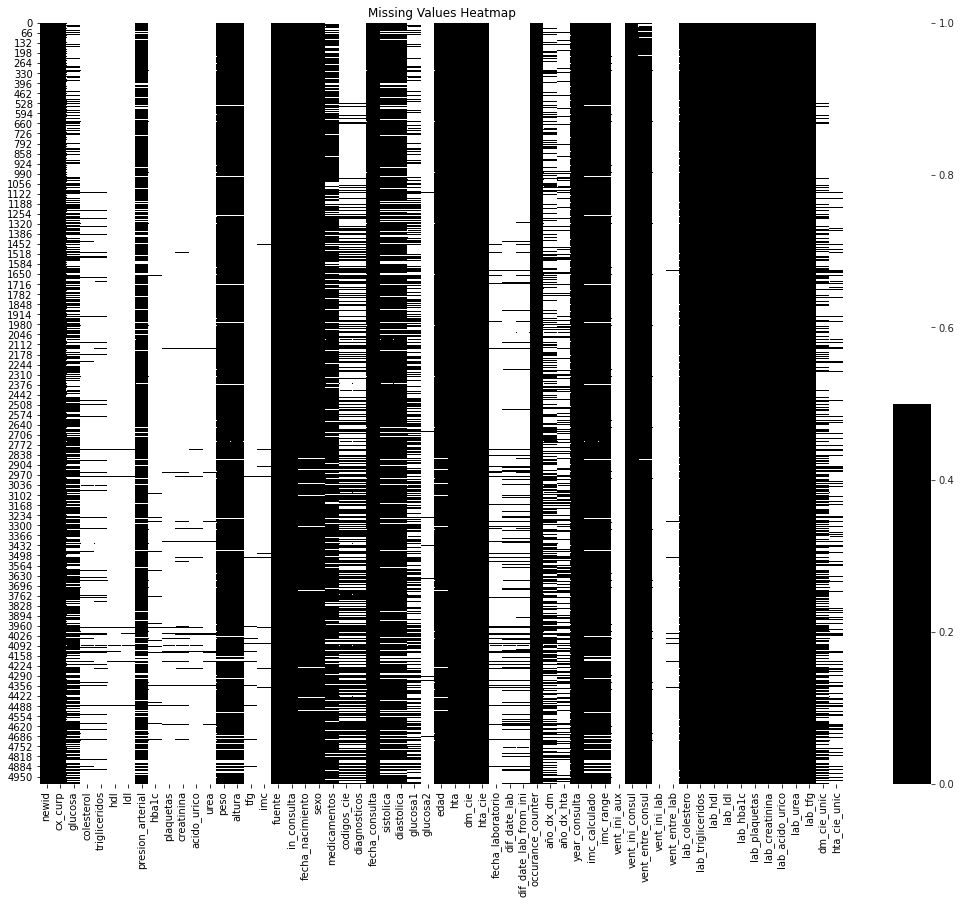

In [28]:
cols = df.columns 
colours = ["#000000","#FFFFFF"]
f, ax = plt.subplots(figsize = (18,14))
sns.set_style("whitegrid")
plt.title('Missing Values Heatmap', )
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours));

**Distribución de las variables númericas**

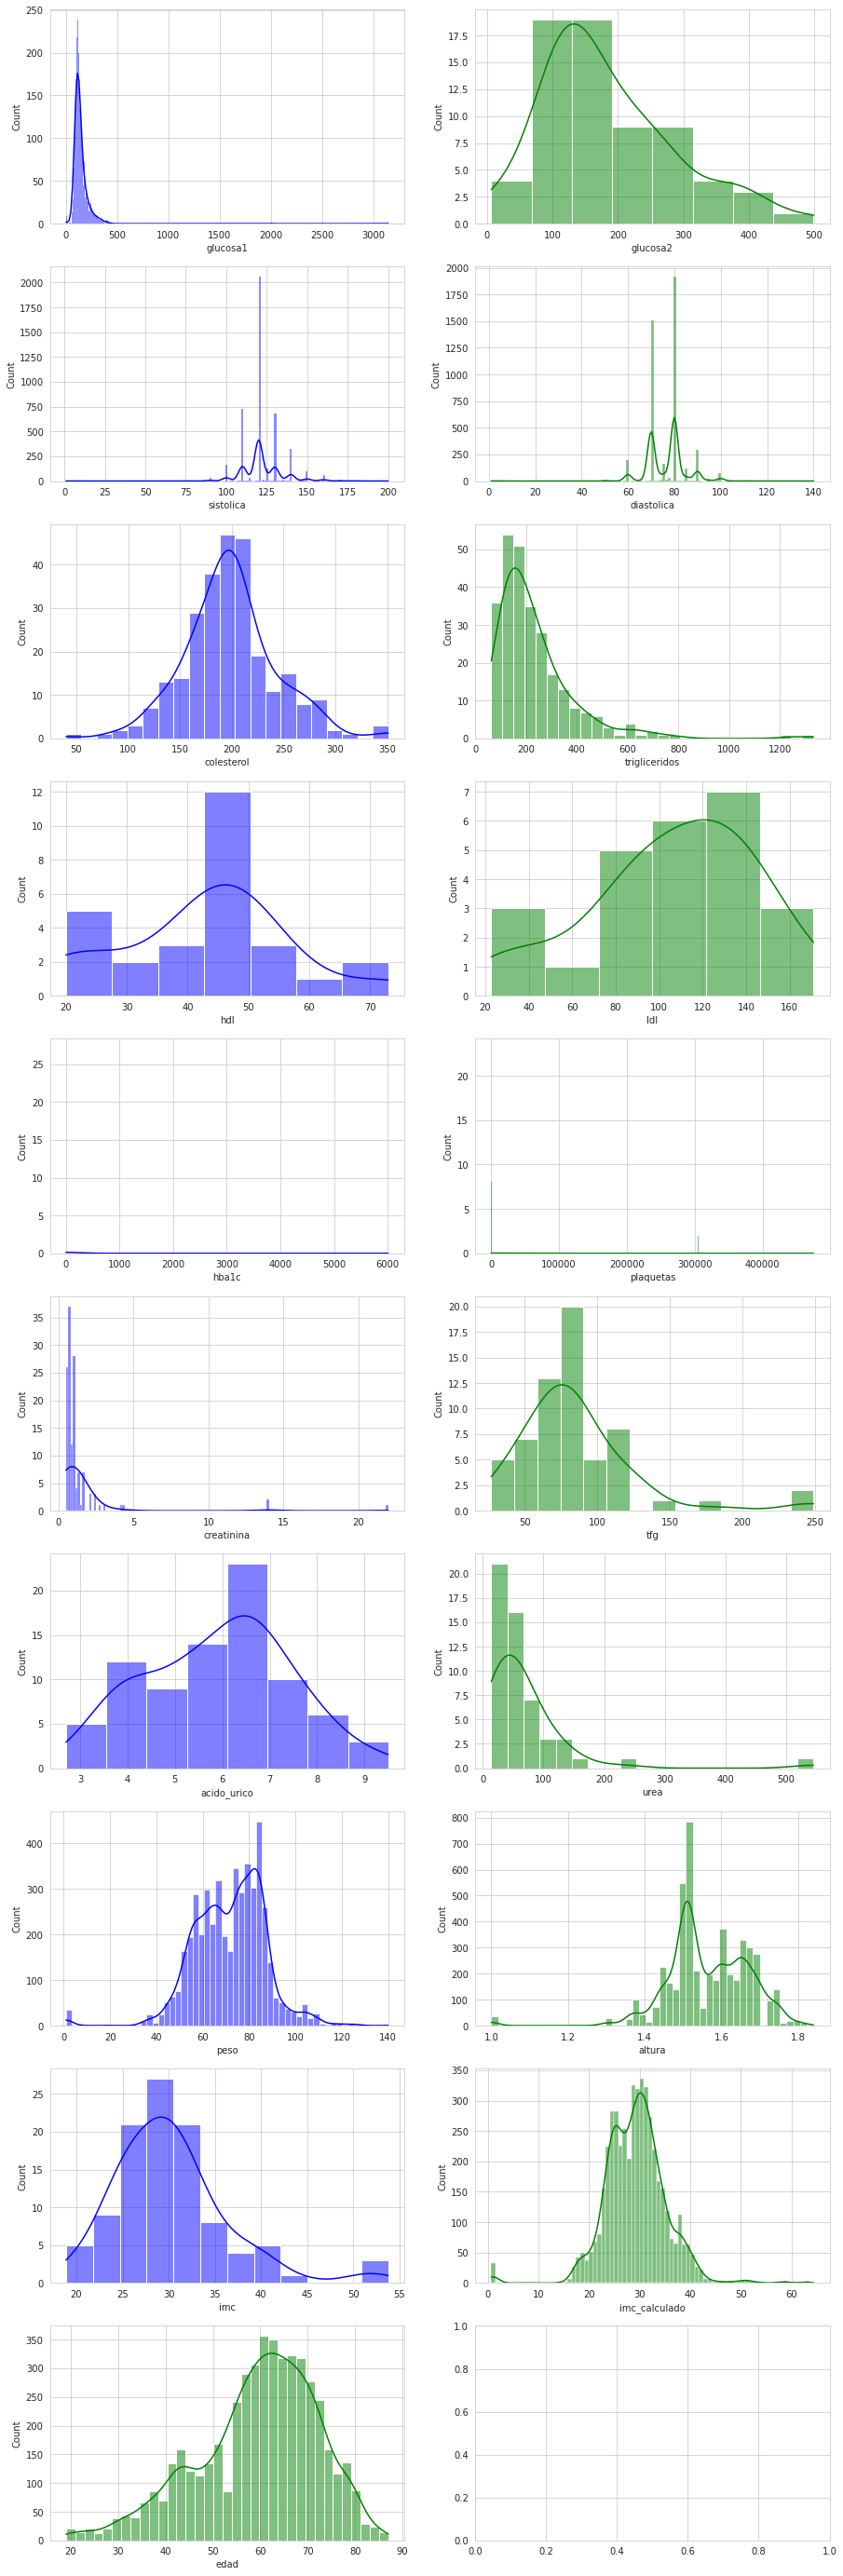

In [29]:
fig, axs = plt.subplots(10, 2, figsize=(15, 50))

sns.histplot(data = df, x="glucosa1", kde=True, color="blue", ax=axs[0,0])
sns.histplot(data = df, x="glucosa2", kde=True, color="green", ax=axs[0,1])
sns.histplot(data = df, x="sistolica", kde=True, color="blue", ax=axs[1,0])
sns.histplot(data = df, x="diastolica", kde=True, color="green", ax=axs[1,1])
sns.histplot(data = df, x="colesterol", kde=True, color="blue", ax=axs[2,0])
sns.histplot(data = df, x="trigliceridos", kde=True, color="green", ax=axs[2,1])
sns.histplot(data = df, x="hdl", kde=True, color="blue", ax=axs[3,0])
sns.histplot(data = df, x="ldl", kde=True, color="green", ax=axs[3,1])
sns.histplot(data = df, x="hba1c", kde=True, color="blue", ax=axs[4,0])
sns.histplot(data = df, x="plaquetas", kde=True, color="green", ax=axs[4,1])
sns.histplot(data = df, x="creatinina", kde=True, color="blue", ax=axs[5,0])
sns.histplot(data = df, x="tfg", kde=True, color="green", ax=axs[5,1])
sns.histplot(data = df, x="acido_urico", kde=True, color="blue", ax=axs[6,0])
sns.histplot(data = df, x="urea", kde=True, color="green", ax=axs[6,1])
sns.histplot(data = df, x="peso", kde=True, color="blue", ax=axs[7,0])
sns.histplot(data = df, x="altura", kde=True, color="green", ax=axs[7,1])
sns.histplot(data = df, x="imc", kde=True, color="blue", ax=axs[8,0])
sns.histplot(data = df, x="imc_calculado", kde=True, color="green", ax=axs[8,1])
sns.histplot(data = df, x="edad", kde=True, color="green", ax=axs[9,0])

plt.show()

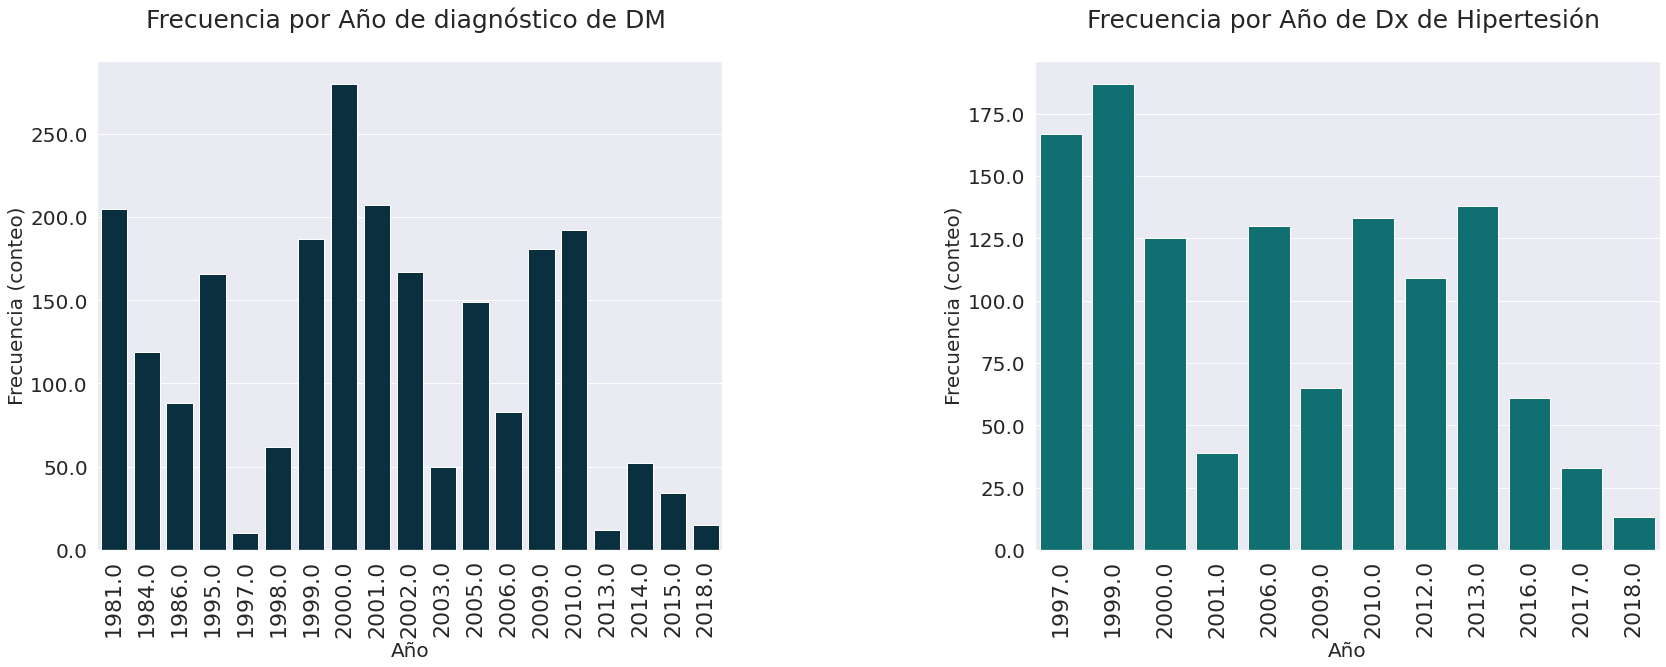

In [30]:
order = df['año_dx_dm'].sort_values().unique()
order = order[~pd.isnull(order)]

sns.set(font_scale = 2)
f, axes = plt.subplots(1, 2, figsize=(28, 9), gridspec_kw={'hspace': 1, 'wspace': 0.5})
g1 = sns.countplot(df["año_dx_dm"], order= order, ax=axes[0], color="#023246")
g1.axes.set_title("Frecuencia por Año de diagnóstico de DM \n",fontsize=25)
g1.set_xlabel("Año",fontsize=20)
g1.set_ylabel("Frecuencia (conteo)",fontsize=20)
g1.set_yticklabels(g1.get_yticks(), size = 20)              
g1.set_xticklabels(g1.get_xticklabels(),rotation = 90)

order = df['año_dx_hta'].sort_values().unique()
order = order[~pd.isnull(order)]

g2 = sns.countplot(df["año_dx_hta"], order= order, ax=axes[1], color="#008081")
g2.axes.set_title("Frecuencia por Año de Dx de Hipertesión \n",fontsize=25)
g2.set_xlabel("Año",fontsize=20)
aux = g2.set_ylabel("Frecuencia (conteo)",fontsize=20)
g2.set_yticklabels(g2.get_yticks(), size = 20)    
g2.set_xticklabels(g2.get_xticklabels(),rotation = 90)
print("")

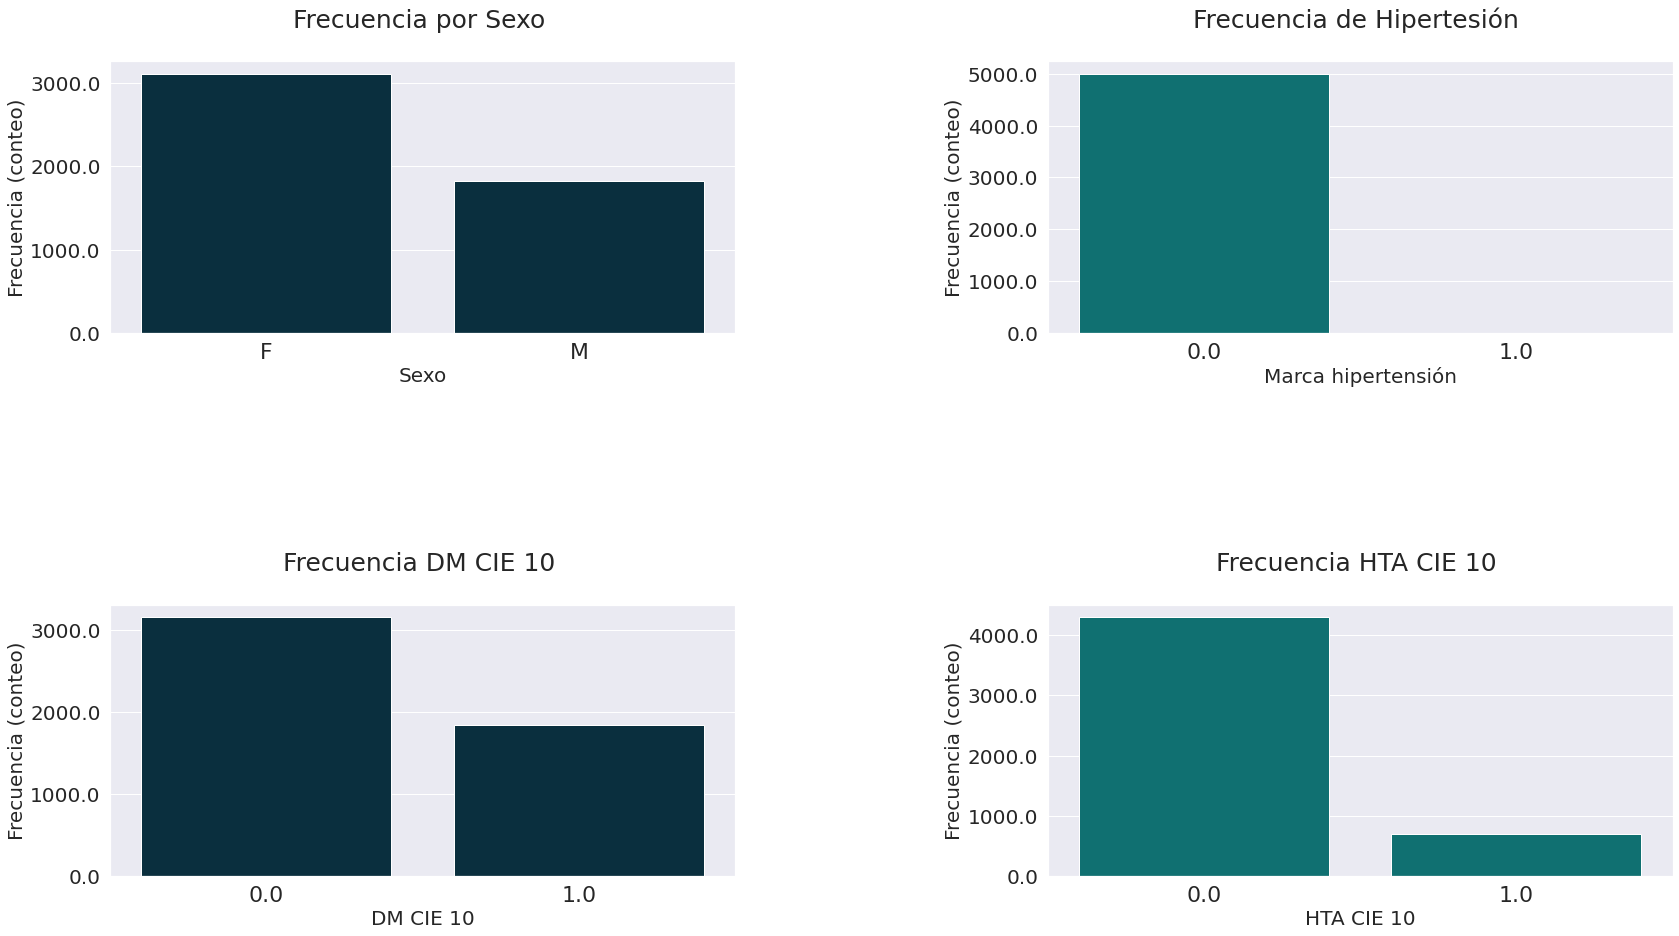

In [31]:
sns.set(font_scale = 2)
f, axes = plt.subplots(2, 2, figsize=(28, 15), gridspec_kw={'hspace': 1, 'wspace': 0.5})

g1 = sns.countplot(df_aux["sexo"], ax=axes[0,0], color="#023246")
g1.axes.set_title("Frecuencia por Sexo \n",fontsize=25)
g1.set_xlabel("Sexo",fontsize=20)
g1.set_ylabel("Frecuencia (conteo)",fontsize=20)
g1.set_yticklabels(g1.get_yticks(), size = 20)              
#g1.set_xticklabels(g1.get_xticklabels(),rotation = 90)

g2 = sns.countplot(df_aux["hta"], ax=axes[0,1], color="#008081")
g2.axes.set_title("Frecuencia de Hipertesión \n",fontsize=25)
g2.set_xlabel("Marca hipertensión",fontsize=20)
g2.set_ylabel("Frecuencia (conteo)",fontsize=20)
g2.set_yticklabels(g2.get_yticks(), size = 20)    
#g2.set_xticklabels(g2.get_xticklabels(),rotation = 90)

g3 = sns.countplot(df_aux["dm_cie"], ax=axes[1,0], color="#023246")
g3.axes.set_title("Frecuencia DM CIE 10 \n",fontsize=25)
g3.set_xlabel("DM CIE 10",fontsize=20)
g3.set_ylabel("Frecuencia (conteo)",fontsize=20)
g3.set_yticklabels(g3.get_yticks(), size = 20)              
#g3.set_xticklabels(g3.get_xticklabels(),rotation = 90)

g4 = sns.countplot(df_aux["hta_cie"], ax=axes[1,1], color="#008081")
g4.axes.set_title("Frecuencia HTA CIE 10 \n",fontsize=25)
g4.set_xlabel("HTA CIE 10",fontsize=20)
g4.set_ylabel("Frecuencia (conteo)",fontsize=20)
g4.set_yticklabels(g4.get_yticks(), size = 20)    
#g4.set_xticklabels(g4.get_xticklabels(),rotation = 90)

print("")

<Figure size 4000x4000 with 0 Axes>

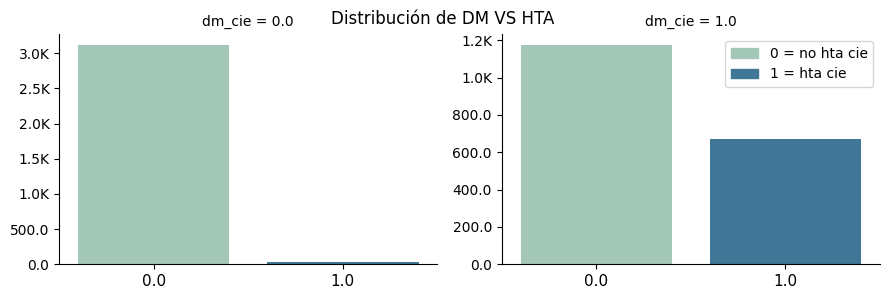

In [32]:
sns.reset_defaults()
dm_hta = df_aux.groupby(['dm_cie', 'hta_cie'],
                          as_index=False)['newid']\
                          .count()\
                          .rename(columns={'newid': 'registros'})

fig = plt.figure(figsize=(40,40))
colors = ['#9ECEB8', '#327BA4']# colores de 'YlGnBu'

a = sns.FacetGrid(data=dm_hta, col='dm_cie', col_wrap=2, sharex=False, sharey=False,
                 aspect=1.5)
a.map_dataframe(sns.barplot, x='hta_cie', y='registros', palette = colors)
for ax in a.axes.flat:
    for label in ax.get_xticklabels():
        label.set_size(11)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(utils.number_formatter))
        a.fig.tight_layout()
    
plt.subplots_adjust(top=0.9)

aux = a.fig.suptitle("Distribución de DM VS HTA \n \n \n", fontsize=12)


# The color cycles are going to all the same, doesn't matter which axes we use
Ax = a.axes[0]


# Some how for a plot of 5 bars, there are 6 patches, what is the 6th one?
Boxes = [item for item in Ax.get_children()
         if isinstance(item, matplotlib.patches.Rectangle)][:-1]

# There is no labels, need to define the labels
legend_labels  = ['0 = no hta cie', '1 = hta cie']

# Create the legend patches
legend_patches = [matplotlib.patches.Patch(color=C, label=L) for
                  C, L in zip([item.get_facecolor() for item in Boxes],
                              legend_labels)]

# Plot the legend
plt.legend(handles=legend_patches)

**Covariables**

In [33]:
corr = df.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

,colesterol,trigliceridos,hdl,ldl,hba1c,plaquetas,creatinina,acido_urico,urea,peso,altura,tfg,imc,in_consulta,sistolica,diastolica,glucosa1,glucosa2,edad,dif_date_lab,dif_date_lab_from_ini,occurance_counter,año_dx_dm,año_dx_hta,year_consulta,imc_calculado,vent_ini_consul,vent_entre_consul,vent_ini_lab,vent_entre_lab,lab_colestero,lab_trigliceridos,lab_hdl,lab_ldl,lab_hba1c,lab_plaquetas,lab_creatinina,lab_acido_urico,lab_urea,lab_tfg,dm_cie_unic,hta_cie_unic
colesterol,1.00,0.29,0.24,0.44,0.15,0.08,-0.09,0.11,-0.23,-0.14,-0.15,-0.11,-0.15,-0.19,-0.05,0.03,0.06,0.18,0.22,0.25,-0.13,0.05,0.13,0.11,-0.25,-0.06,-0.24,-0.01,nan,0.41,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.01,-0.01
trigliceridos,0.29,1.00,-0.34,-0.24,-0.03,0.02,0.05,0.11,0.15,-0.01,-0.23,-0.22,0.14,-0.15,-0.02,-0.06,0.46,0.73,-0.24,0.28,0.03,0.02,-0.16,-0.25,-0.12,0.15,-0.12,-0.10,nan,0.45,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,-0.14,0.00
hdl,0.24,-0.34,1.00,0.50,-0.09,0.67,0.66,0.03,-0.23,0.18,0.21,-0.46,0.10,-0.01,0.11,0.09,-0.38,nan,-0.11,0.11,0.12,nan,0.05,0.76,-0.10,0.04,-0.52,-0.11,nan,-1.00,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,nan,0.24
ldl,0.44,-0.24,0.50,1.00,0.30,-0.09,0.10,-0.11,0.97,0.38,0.40,-0.20,-0.18,-0.11,0.02,-0.17,-0.11,nan,0.15,0.18,0.32,nan,0.06,0.39,-0.21,0.13,-0.59,-0.05,nan,0.51,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,nan,-0.13
hba1c,0.15,-0.03,-0.09,0.30,1.00,-0.54,0.47,-0.55,0.63,0.02,-0.16,-0.49,-0.13,-0.15,0.11,0.09,-0.03,0.11,0.03,-0.00,0.15,0.10,0.18,0.14,-0.03,0.11,-0.17,-0.02,nan,0.75,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,nan,-0.07
plaquetas,0.08,0.02,0.67,-0.09,-0.54,1.00,-0.01,0.31,0.27,0.08,0.11,-0.48,0.27,0.10,0.05,0.06,-0.00,0.11,-0.16,-0.13,0.12,nan,-0.24,0.55,-0.02,0.05,-0.24,-0.04,nan,-0.20,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.06,-0.40
creatinina,-0.09,0.05,0.66,0.10,0.47,-0.01,1.00,-0.22,0.20,0.08,0.01,-0.33,0.09,0.05,0.01,-0.05,0.03,-0.16,-0.10,0.30,0.15,nan,-0.32,-0.00,-0.09,0.09,0.03,0.01,nan,-0.00,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,-0.73,-0.20
acido_urico,0.11,0.11,0.03,-0.11,-0.55,0.31,-0.22,1.00,-0.19,-0.13,0.12,-0.34,0.24,-0.27,0.07,0.11,-0.17,-0.76,0.34,0.09,-0.28,nan,0.34,-0.11,-0.21,-0.16,-0.12,0.01,nan,-0.20,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,nan,-0.06
urea,-0.23,0.15,-0.23,0.97,0.63,0.27,0.20,-0.19,1.00,0.29,0.44,-0.77,-0.26,0.22,0.05,-0.13,-0.04,1.00,0.05,0.22,0.65,nan,-0.08,0.26,-0.01,0.05,0.02,0.05,nan,0.08,-0.30,-0.30,-0.30,-0.30,-0.30,-0.30,-0.30,-0.30,-0.30,-0.30,0.06,nan
peso,-0.14,-0.01,0.18,0.38,0.02,0.08,0.08,-0.13,0.29,1.00,0.51,0.41,0.65,0.03,0.09,0.13,0.06,-0.05,-0.18,-0.04,0.02,-0.09,-0.08,0.22,-0.01,0.81,-0.03,0.04,nan,-0.40,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,-0.02,-0.03


**Edad primera toma presión arterial**

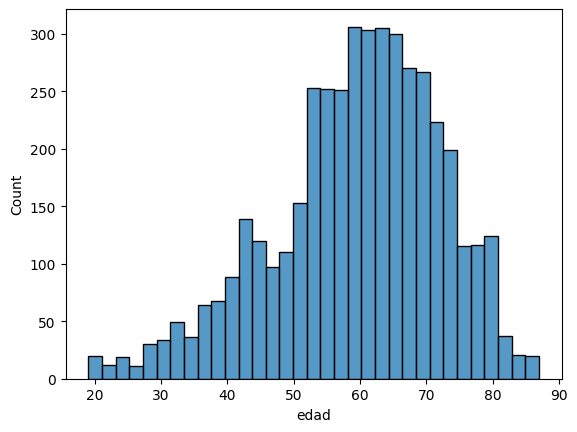

In [34]:
df_pru = df[(~df['sistolica'].isnull()) & (df.sistolica != 0) &
       (~df['diastolica'].isnull()) & (df.diastolica != 0) & (~df['edad'].isnull())]\
      [['newid','sistolica','diastolica','edad','fecha_consulta']].sort_values('newid')
sns.histplot(data=df_pru.groupby(["newid", "edad"])["fecha_consulta"].first(), x="edad")
plt.show()

**Edad presión primera presión arterial alta**

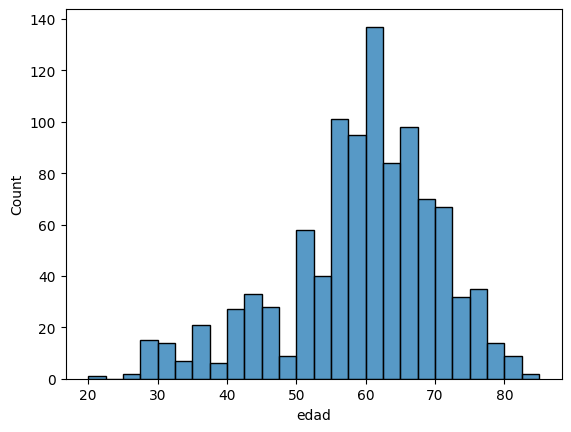

In [35]:
df_pru = df[(df.sistolica >= 130) & (df.diastolica >= 80) & (~df['edad'].isnull())]\
      [['newid','sistolica','diastolica','edad','fecha_consulta']].sort_values('newid')
sns.histplot(data=df_pru.groupby(["newid", "edad"])["fecha_consulta"].first(), x="edad")
plt.show()

- Relacion IMC Presion arterial

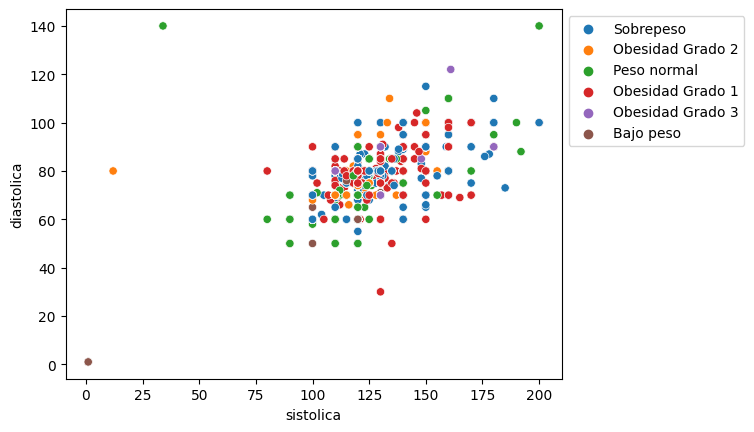

In [36]:
sns.scatterplot(x='sistolica', y='diastolica', hue='imc_range', data=df)  
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

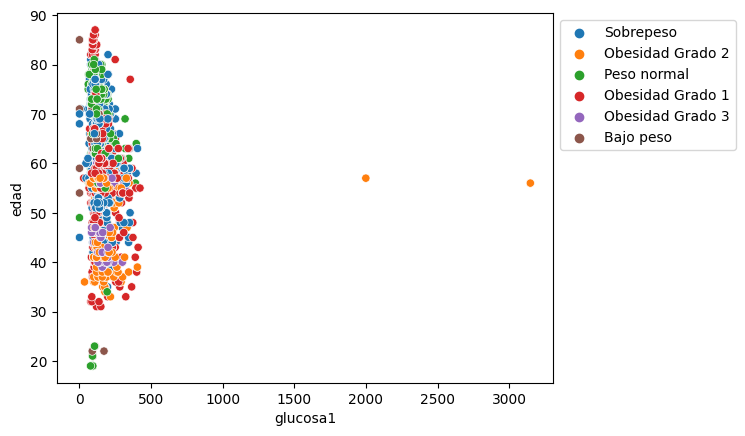

In [37]:
sns.scatterplot(x='glucosa1', y='edad', hue='imc_range', data=df)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

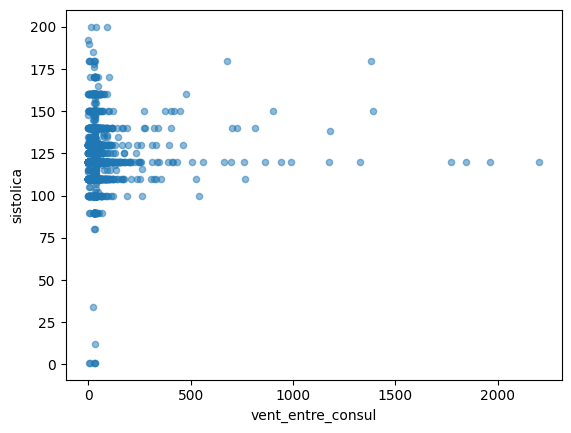

In [38]:
df.plot.scatter(x='vent_entre_consul', y='sistolica', alpha = 0.5);

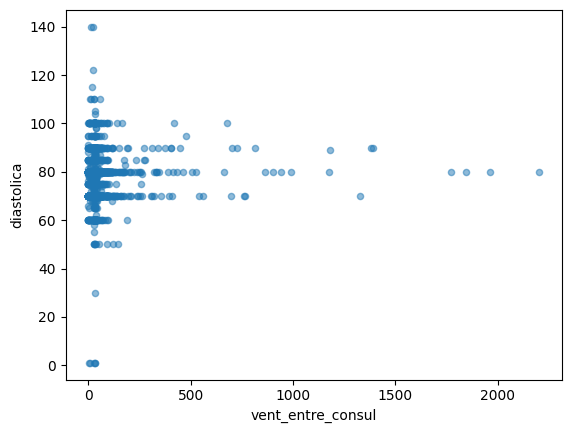

In [39]:
df.plot.scatter(x='vent_entre_consul', y='diastolica', alpha = 0.5);